# Logistic Regression ( Binary Classification )


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 1. 데이터 불러오기 및 전처리

In [2]:
# 데이터 불러오기 ( Binary분류를 위해서 데이터중 100개까지만 불러오기 )
data = pd.read_csv("Iris.csv")[:100]

# 데이터 정보
print(data.shape)
print(data.info())
print(data.columns)

(100, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
Id               100 non-null int64
SepalLengthCm    100 non-null float64
SepalWidthCm     100 non-null float64
PetalLengthCm    100 non-null float64
PetalWidthCm     100 non-null float64
Species          100 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB
None
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [3]:
# 데이터 정재 ( 필요없는 열 업애기 )
data = data.drop(labels=['Id'],axis=1)

# y값 one-hot encoding
data['Species'] = data['Species'].replace(to_replace=['Iris-setosa', 'Iris-versicolor'],value=[0,1])

# 훈련 데이터, 검증 데이터 나누기
train_data, test_data = train_test_split(data, test_size=0.2)

train_X = train_data.drop(labels=['Species'],axis=1).values
train_Y = train_data['Species']

test_X = test_data.drop(labels=['Species'],axis=1).values
test_Y = test_data['Species']

## 2. 정규화

In [4]:
# 정규화 ( Normalization )
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [5]:
# 텐서플로우 상수로 변환
train_X = tf.constant(train_X, dtype=tf.float32)
train_Y = tf.constant(train_Y, dtype=tf.float32)

test_X = tf.constant(test_X, dtype=tf.float32)
test_Y = tf.constant(test_Y, dtype=tf.float32)

## 3. 파라미터 설정

In [9]:
# 파라미터 설정
W = tf.Variable(np.random.rand(4,1), dtype=tf.float32)
b = tf.Variable(np.random.rand(), dtype=tf.float32)

# 하이퍼 파라미터 설정
learning_rate = 0.003
num_epochs = 2000


## 4. 함수 정의

In [10]:
# 함수 정의 - 가설함수(Hypothesis)에 시그모이드 함수를 적용. ( softmax를 사용하여도 된다. )
def hypothesis(x):
    # return tf.nn.softmax(tf.matmul(x,W)+b)
    return tf.sigmoid(tf.matmul(x,W)+b)

# 비용 함수 - Cross-Entropy 사용한 비용 함수.
def cost_function(y_true, y_pred):
    return -tf.reduce_mean((y_true*tf.math.log(y_pred)) + ((1.0 - y_true)*tf.math.log(1.0 - y_pred)))

def run_optimizer(x,y):
    with tf.GradientTape() as tape:
        predict = hypothesis(x)
        cost = cost_function(y, predict)

    dJ_dW, dJ_db = tape.gradient(cost,[W,b])
    W.assign_sub(learning_rate*dJ_dW)
    b.assign_sub(learning_rate*dJ_db)
    
# optimizer = tf.optimizers.SGD(learning_rate)
#
# def run_optimizer(x, y):
#     with tf.GradientTape() as tape:
#         predict = hypothesis(train_X)
#         cost = cost_function(train_Y, predict)
#
#     gradient = tape.gradient(cost, [W,b])
#
#     optimizer.apply_gradients(zip(gradient,[W,b]))

# 모델 정확도 측정
def accuracy(y_true, y_pred):
    predict = tf.round(y_pred)
    correct = tf.cast(tf.equal(predict, y_true), dtype=tf.float32)
    accuracy = tf.reduce_mean(correct)
    return accuracy

epoch: 0 cost: 0.7927083 accuracy: 0.4875
epoch: 100 cost: 0.77087575 accuracy: 0.4875
epoch: 200 cost: 0.7535574 accuracy: 0.4875
epoch: 300 cost: 0.7399428 accuracy: 0.4875
epoch: 400 cost: 0.7293211 accuracy: 0.4875
epoch: 500 cost: 0.7210806 accuracy: 0.4875
epoch: 600 cost: 0.714717 accuracy: 0.4875
epoch: 700 cost: 0.7098206 accuracy: 0.4875
epoch: 800 cost: 0.7060637 accuracy: 0.4878125
epoch: 900 cost: 0.7031836 accuracy: 0.4884375
epoch: 1000 cost: 0.7009775 accuracy: 0.490625
epoch: 1100 cost: 0.69928914 accuracy: 0.495
epoch: 1200 cost: 0.6979967 accuracy: 0.4971875
epoch: 1300 cost: 0.6970065 accuracy: 0.4984375
epoch: 1400 cost: 0.6962473 accuracy: 0.4996875
epoch: 1500 cost: 0.69566065 accuracy: 0.5003125
epoch: 1600 cost: 0.6952083 accuracy: 0.5003125
epoch: 1700 cost: 0.69485915 accuracy: 0.5003125
epoch: 1800 cost: 0.6945874 accuracy: 0.5003125
epoch: 1900 cost: 0.6943749 accuracy: 0.5003125


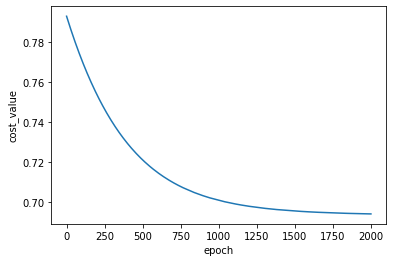

In [11]:
cost_log = []
for epoch in range(num_epochs):

    run_optimizer(train_X, train_Y)
    cost_value = cost_function(train_Y, hypothesis(train_X))

    if(epoch % 100 == 0):
        print("epoch:",epoch,"cost:",cost_value.numpy(),"accuracy:",accuracy(train_Y,hypothesis(train_X)).numpy())
    cost_log.append(cost_value)

plt.plot(np.arange(num_epochs),cost_log,label="cost_value")
plt.xlabel('epoch')
plt.ylabel('cost_value')
plt.show()